In [2]:
from IPython.display import Image
import torch
import numpy as np
import matplotlib.pyplot as plt

## LSTM Cell

The development of Long Short-Term Memory (LSTM) cells was primarily motivated by addressing fundamental limitations of traditional Recurrent Neural Networks (RNNs). The main intention was to solve the vanishing gradient problem that plagued standard RNNs. In traditional RNNs, gradients tend to either vanish or explode when backpropagated through many time steps, making it difficult to learn long-term dependencies.

LSTMs were designed to effectively capture and utilize information over long sequences. Standard RNNs struggle to connect information from distant past to the present, while LSTMs can maintain relevant information in their cell state for extended periods.

The creators wanted a mechanism that could selectively remember or forget information. This led to the introduction of various gates (input, forget, output) that allow the network to decide what information to store, what to throw away, and what to use for output.

In standard RNNs, all information flows through a single tanh layer, creating an information bottleneck. LSTMs use separate pathways for carrying forward cell state information and for computing the output, reducing this bottleneck.

The LSTM architecture, introduced by Hochreiter and Schmidhuber in 1997, successfully addressed many of the RNNs problems and the success of LSTMs paved the way for further innovations in sequence modeling, including variants like GRU (Gated Recurrent Unit) and, more recently, attention mechanisms and transformer architectures. However, LSTMs remain relevant and widely used, especially in scenarios where explicit modeling of sequential dependencies is crucial.

The main idea of LSTM cell is interconnect neurons in a system that be capable of decide what information use, remember or forget an update the cell and hidden states based on that. 



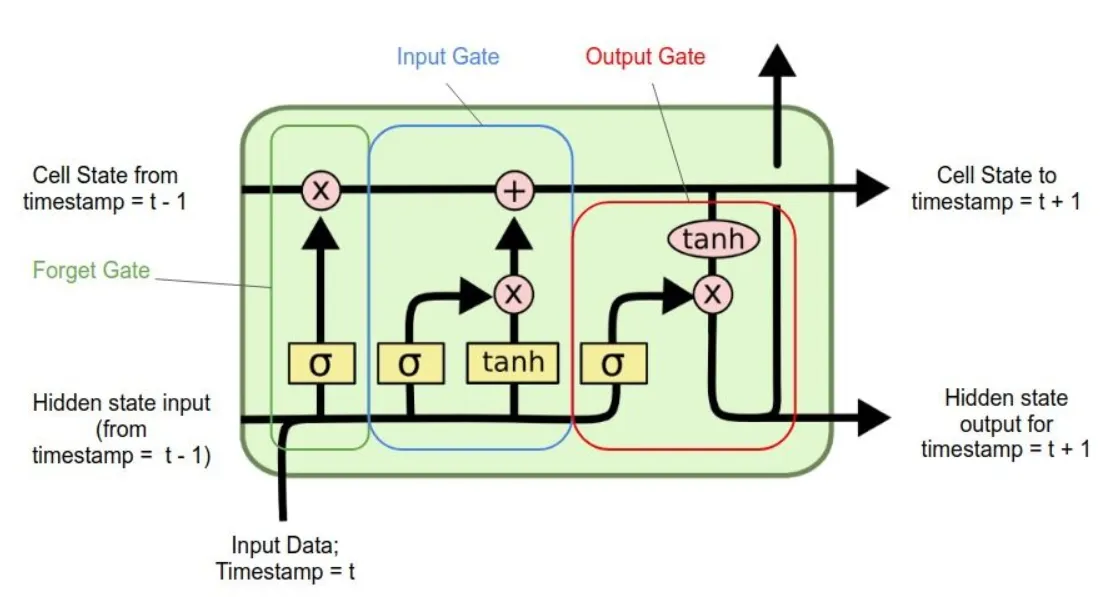

In [3]:
Image("images/lstm_cell.png")

### Cell Components

#### Input Gate
$$i_t = \sigma(W_{ii} x_t + W_{hi} h_{t-1} + b_i)$$
The input gate determines how much of the newly computed state for the current input will be used. It takes the current input $x_t$ and the previous hidden state $h_{t-1}$ as inputs. Controls the flow of new information into the cell state. It helps the network decide which new information is important to keep.

#### Forget Gate
$$f_t = \sigma(W_{if} x_t + W_{hf} h_{t-1} + b_f)$$
The forget gate decides what information to discard from the cell state. It also uses the current input and previous hidden state. Allows the network to forget irrelevant information from the past. This is crucial for processing long sequences where old information may become obsolete.

#### Cell Gate
$$g_t = \tanh(W_{ig} x_t + W_{hg} h_{t-1} + b_g)$$
The cell gate generates a new candidate value to be added to the cell state. This is the main information that could be added to the cell state. Generates new candidate values that could be added to the cell state. This is where the network proposes new information to potentially remember.

#### Output Gate
$$o_t = \sigma(W_{io} x_t + W_{ho} h_{t-1} + b_o)$$
The output gate determines how much of the internal state to reveal to the external network (i.e., to the next time step and to the final output). Controls what parts of the cell state are output to the hidden state. This allows the network to output only relevant parts of its memory.

#### Cell State Update
$$c_t = f_t \odot c_{t-1} + i_t \odot g_t$$
This equation updates the cell state. It forgets old information (controlled by the forget gate) and adds new information (controlled by the input gate and cell gate). Acts as the memory of the network. It can maintain information over long sequences, allowing the LSTM to capture long-term dependencies.

#### Hidden State Update
$$h_t = o_t \odot \tanh(c_t)$$
This computes the new hidden state, which is a filtered version of the cell state, controlled by the output gate. Serves as the output of the LSTM cell for this time step and is used as input for the next time step. It contains filtered information from the cell state.
Where:


- $\sigma$ is the sigmoid function
- $\tanh$ is the hyperbolic tangent function
- $\odot$ represents element-wise multiplication
- $x_t$ is the input vector at time $t$
- $h_t$ is the hidden state at time $t$
- $c_t$ is the cell state at time $t$
- $W$ and $b$ are weight matrices and bias vectors respectively

The combination of these components allows the LSTM to selectively remember or forget information over long sequences, making it particularly effective for tasks involving long-term dependencies.

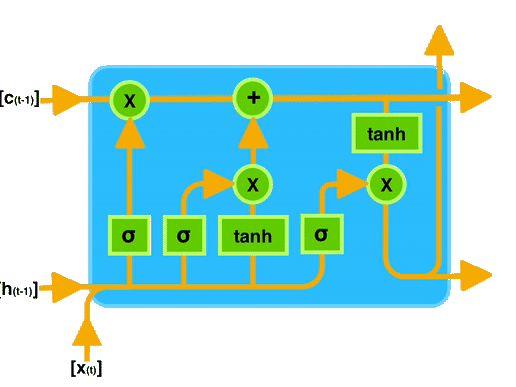

In [6]:
Image("images/lstm.gif")

In [11]:
class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # initialize weights and biases
        self.W_ii = torch.randn(input_size, hidden_size, requires_grad=True)
        self.W_hi = torch.randn(hidden_size, hidden_size, requires_grad=True)
        self.b_i = torch.randn(hidden_size, requires_grad=True)
        
        self.W_if = torch.randn(input_size, hidden_size, requires_grad=True)
        self.W_hf = torch.randn(hidden_size, hidden_size, requires_grad=True)
        self.b_f = torch.randn(hidden_size, requires_grad=True)
        
        self.W_ig = torch.randn(input_size, hidden_size, requires_grad=True)
        self.W_hg = torch.randn(hidden_size, hidden_size, requires_grad=True)
        self.b_g = torch.randn(hidden_size, requires_grad=True)
        
        self.W_io = torch.randn(input_size, hidden_size, requires_grad=True)
        self.W_ho = torch.randn(hidden_size, hidden_size, requires_grad=True)
        self.b_o = torch.randn(hidden_size, requires_grad=True)

    def forward(self, x, h_prev, c_prev):
        # input gate
        i = torch.sigmoid(x @ self.W_ii + h_prev @ self.W_hi + self.b_i)
        
        # forget gate
        f = torch.sigmoid(x @ self.W_if + h_prev @ self.W_hf + self.b_f)
        
        # cell gate
        g = torch.tanh(x @ self.W_ig + h_prev @ self.W_hg + self.b_g)
        
        # output gate
        o = torch.sigmoid(x @ self.W_io + h_prev @ self.W_ho + self.b_o)
        
        # new cell state
        c_next = f * c_prev + i * g
        
        # new hidden state
        h_next = o * torch.tanh(c_next)
        
        return h_next, c_next

    def init_hidden(self):
        return (torch.zeros(self.hidden_size),
                torch.zeros(self.hidden_size))

class ManualLSTM:
    def __init__(self, input_size, hidden_size, output_size):
        self.lstm_cell = LSTMCell(input_size, hidden_size)
        self.W_hy = torch.randn(hidden_size, output_size, requires_grad=True)
        self.b_y = torch.randn(output_size, requires_grad=True)

    def forward(self, x):
        h_t, c_t = self.lstm_cell.init_hidden()
        outputs = []
        
        for t in range(x.size(0)):
            x_t = x[t]
            h_t, c_t = self.lstm_cell.forward(x_t, h_t, c_t)
            o_t = h_t @ self.W_hy + self.b_y
            outputs.append(o_t)
        
        return torch.stack(outputs)

    def parameters(self):
        return [self.lstm_cell.W_ii, self.lstm_cell.W_hi, self.lstm_cell.b_i,
                self.lstm_cell.W_if, self.lstm_cell.W_hf, self.lstm_cell.b_f,
                self.lstm_cell.W_ig, self.lstm_cell.W_hg, self.lstm_cell.b_g,
                self.lstm_cell.W_io, self.lstm_cell.W_ho, self.lstm_cell.b_o,
                self.W_hy, self.b_y]

Epoch 0, Loss: 0.011608187109231949
Epoch 2, Loss: 0.0004958451027050614
Epoch 4, Loss: 0.00021961942547932267
Epoch 6, Loss: 0.00012409537157509476
Epoch 8, Loss: 7.743422611383721e-05


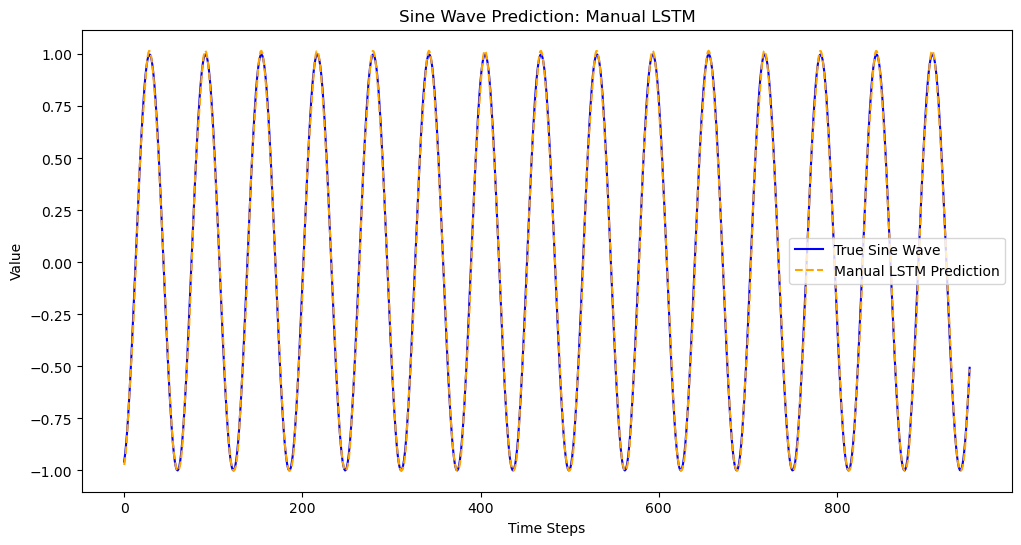

In [12]:

# Set random seed for reproducibility
torch.manual_seed(101)

# Parameters
seq_length = 50
input_size = 1
hidden_size = 10
output_size = 1

# Generate sine wave data
x = np.linspace(0, 100, 1000)
y = np.sin(x)

# Prepare dataset
def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return np.array(X), np.array(Y)

X, Y = create_dataset(y, seq_length)
X = torch.tensor(X, dtype=torch.float32).view(-1, seq_length, input_size)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, output_size)

# Initialize the LSTM model
manual_model = ManualLSTM(input_size, hidden_size, output_size)

# Training parameters
learning_rate = 0.01
epochs = 10

# Training loop
for epoch in range(epochs):
    for i in range(X.size(0)):
        x_t = X[i]
        y_t = Y[i]
        
        # Forward pass
        outputs = manual_model.forward(x_t)
        loss = torch.nn.functional.mse_loss(outputs[-1], y_t)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        with torch.no_grad():
            for param in manual_model.parameters():
                param -= learning_rate * param.grad
                param.grad.zero_()
    
    if epoch % 2 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plotting results
pred_manual = []
with torch.no_grad():
    for i in range(X.size(0)):
        pred_manual.append(manual_model.forward(X[i]).detach().numpy()[-1])
pred_manual = np.array(pred_manual).flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y[seq_length:], label='True Sine Wave', color='blue')
plt.plot(pred_manual, label='Manual LSTM Prediction', color='orange', linestyle='dashed')
plt.legend()
plt.title('Sine Wave Prediction: Manual LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()